In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline

# The data 
Let's start by reading in the incident_event_log.csv file into a pandas dataframe.

In [2]:
data=pd.read_csv("incident_event_log.csv")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [5]:
data.shape

(141712, 36)

In [6]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [7]:
data.columns = ['number', 'incidentstate', 'active', 'reassignmentcount',
       'reopencount', 'sysmodcount', 'madesla', 'callerid', 'openedby',
       'openedat', 'syscreatedby', 'syscreatedat', 'sysupdatedby',
       'sysupdatedat', 'contacttype', 'location', 'category', 'subcategory',
       'usymptom', 'cmdbci', 'impact', 'urgency', 'priority',
       'assignmentgroup', 'assignedto', 'knowledge',
       'upriorityconfirmation', 'notify', 'problemid', 'rfc', 'vendor',
       'causedby', 'closedcode', 'resolvedby', 'resolvedat', 'closedat']

In [8]:
Data=data.drop(['madesla','cmdbci','urgency','priority','vendor','resolvedat','closedat','closedcode','causedby'],axis=1)

In [9]:
Data.shape

(141712, 27)

In [10]:
Data.head(5)

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,callerid,openedby,openedat,syscreatedby,syscreatedat,sysupdatedby,sysupdatedat,contacttype,location,category,subcategory,usymptom,impact,assignmentgroup,assignedto,knowledge,upriorityconfirmation,notify,problemid,rfc,resolvedby
0,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,Group 56,?,True,False,Do Not Notify,?,?,Resolved by 149
1,INC0000045,Resolved,True,0,0,2,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,Group 56,?,True,False,Do Not Notify,?,?,Resolved by 149
2,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,Group 56,?,True,False,Do Not Notify,?,?,Resolved by 149
3,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,2 - Medium,Group 56,?,True,False,Do Not Notify,?,?,Resolved by 149
4,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,Group 70,Resolver 89,True,False,Do Not Notify,?,?,Resolved by 81


 # replacing '?' with nan

In [11]:
Data.replace('?', np.nan,inplace=True)

In [12]:
Data.columns

Index(['number', 'incidentstate', 'active', 'reassignmentcount', 'reopencount',
       'sysmodcount', 'callerid', 'openedby', 'openedat', 'syscreatedby',
       'syscreatedat', 'sysupdatedby', 'sysupdatedat', 'contacttype',
       'location', 'category', 'subcategory', 'usymptom', 'impact',
       'assignmentgroup', 'assignedto', 'knowledge', 'upriorityconfirmation',
       'notify', 'problemid', 'rfc', 'resolvedby'],
      dtype='object')

# finding unique values 


In [15]:
variable=['number', 'incidentstate', 'active', 'reassignmentcount', 'reopencount',
       'sysmodcount', 'callerid', 'openedby', 'openedat', 'syscreatedby',
       'syscreatedat', 'sysupdatedby', 'sysupdatedat', 'contacttype',
       'location', 'subcategory', 'usymptom', 'impact', 'assignmentgroup',
       'assignedto', 'knowledge', 'upriorityconfirmation', 'notify',
       'problemid', 'rfc', 'resolvedby','category']

for variable in Data:
    print ('\nFrequency of Categories for varible %s'%variable)
    print (Data[variable].value_counts())
    


Frequency of Categories for varible number
INC0019396    58
INC0044260    56
INC0005927    46
INC0020718    45
INC0011206    44
              ..
INC0007941     2
INC0027791     2
INC0007387     2
INC0022504     2
INC0032731     2
Name: number, Length: 24918, dtype: int64

Frequency of Categories for varible incidentstate
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incidentstate, dtype: int64

Frequency of Categories for varible active
True     116726
False     24986
Name: active, dtype: int64

Frequency of Categories for varible reassignmentcount
0     69876
1     37104
2     15097
3      8274
4      4614
5      2595
6      1447
7       985
8       574
9       365
10      285
11      174
12      108
13       61
14       45
15       21
17       16
20       16
16       13
18  

# # Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

# # Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!# 

In [17]:
Data.isnull().sum()

number                        0
incidentstate                 0
active                        0
reassignmentcount             0
reopencount                   0
sysmodcount                   0
callerid                     29
openedby                   4835
openedat                      0
syscreatedby              53076
syscreatedat              53076
sysupdatedby                  0
sysupdatedat                  0
contacttype                   0
location                     76
category                     78
subcategory                 111
usymptom                  32964
impact                        0
assignmentgroup           14213
assignedto                27496
knowledge                     0
upriorityconfirmation         0
notify                        0
problemid                139417
rfc                      140721
resolvedby                  226
dtype: int64

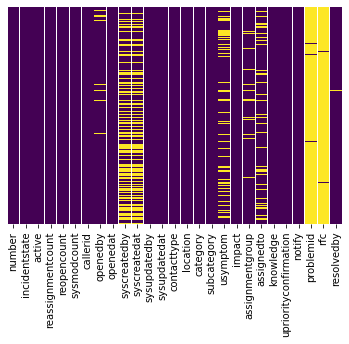

In [19]:
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

 
Roughly 40 percent of the syscreatedby and syscreatedat data is missing.looking at column usersymptom AND assignedto less amount of data is missing nearly around 10% of data.Looking at the problem id , rfc it looks like we are just missing too much of that data nearly 99% of data to do something useful with at a basic level. We'll probably drop this later.

Let's continue on by visualizing some more of the data! 

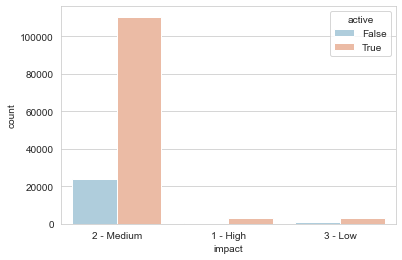

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='impact',hue='active',data=Data,palette='RdBu_r')

#  speed up EDA process using pandas profilling 

In [21]:
import pandas_profiling as pp 

In [22]:
EDA_report= pp.ProfileReport(Data)
EDA_report.to_file(output_file='EDAreport.html')

In [26]:
import dtale

In [28]:
EDA =dtale.show(Data)

In [29]:
EDA

As We can Observe From above Visualisation and value counts data, Features 'problemid'and rfc' are having very high no. of Missing values so we will exclude these features from further analysis. These features add no value to our data analysis. 

# Data cleaning 

In [43]:
data1=Data.drop(['problemid','rfc'],axis=1)

In [44]:
data1.shape

(141712, 25)

In [45]:
data1.isnull().sum()

number                       0
incidentstate                0
active                       0
reassignmentcount            0
reopencount                  0
sysmodcount                  0
callerid                    29
openedby                  4835
openedat                     0
syscreatedby             53076
syscreatedat             53076
sysupdatedby                 0
sysupdatedat                 0
contacttype                  0
location                    76
category                    78
subcategory                111
usymptom                 32964
impact                       0
assignmentgroup          14213
assignedto               27496
knowledge                    0
upriorityconfirmation        0
notify                       0
resolvedby                 226
dtype: int64

In [46]:
for col in ['syscreatedby','usymptom']:
    data1[col].fillna(data1[col].mode()[0],inplace=True)

In [47]:
data1["callerid"].fillna( method ='ffill', inplace = True) 
data1["openedby"].fillna( method ='ffill', inplace = True) 
data1["location"].fillna( method ='ffill', inplace = True) 
data1["subcategory"].fillna( method ='ffill', inplace = True) 
data1["assignedto"].fillna( method ='ffill', inplace = True) 
data1["syscreatedat"].fillna( method ='ffill', inplace = True) 
data1["assignmentgroup"].fillna( method ='ffill', inplace = True) 
data1["resolvedby"].fillna( method ='ffill', inplace = True) 
data1["category"].fillna( method ='ffill', inplace = True) 

In [48]:
data1.isnull().sum()

number                   0
incidentstate            0
active                   0
reassignmentcount        0
reopencount              0
sysmodcount              0
callerid                 0
openedby                 0
openedat                 0
syscreatedby             0
syscreatedat             0
sysupdatedby             0
sysupdatedat             0
contacttype              0
location                 0
category                 0
subcategory              0
usymptom                 0
impact                   0
assignmentgroup          0
assignedto               4
knowledge                0
upriorityconfirmation    0
notify                   0
resolvedby               0
dtype: int64

In [49]:
data2=data1.dropna()

In [50]:
data2.isnull().sum()

number                   0
incidentstate            0
active                   0
reassignmentcount        0
reopencount              0
sysmodcount              0
callerid                 0
openedby                 0
openedat                 0
syscreatedby             0
syscreatedat             0
sysupdatedby             0
sysupdatedat             0
contacttype              0
location                 0
category                 0
subcategory              0
usymptom                 0
impact                   0
assignmentgroup          0
assignedto               0
knowledge                0
upriorityconfirmation    0
notify                   0
resolvedby               0
dtype: int64

In [51]:
data2["caller_id"]=data2["callerid"].apply(lambda x: int(x.split(' ')[-1]))
data2["open_by"]=data2["openedby"].apply(lambda x: int(x.split(' ')[3]))
data2["createdby"]=data2["syscreatedby"].apply(lambda x: int(x.split(' ')[-1]))
data2["updatedby"]=data2["sysupdatedby"].apply(lambda x: int(x.split(' ')[-1]))
data2["loc"]=data2["location"].apply(lambda x: int(x.split(' ')[-1]))
data2["subbcategory"]=data2["subcategory"].apply(lambda x: int(x.split(' ')[-1]))
data2["symptom"]=data2["usymptom"].apply(lambda x: int(x.split(' ')[-1]))
data2["i_impact"]=data2["impact"].apply(lambda x: int(x.split(' ')[0]))
data2["assigned_to"]=data2["assignedto"].apply(lambda x: int(x.split(' ')[-1]))
data2["resolveddby"]=data2["resolvedby"].apply(lambda x: int(x.split(' ')[-1]))
data2["assignmentgroupp"]=data2["assignmentgroup"].apply(lambda x: int(x.split(' ')[-1]))
data2["categoryy"]=data2["category"].apply(lambda x: int(x.split(' ')[-1]))


<ipython-input-51-a29b5a18bd47>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-a29b5a18bd47>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-a29b5a18bd47>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-a29b5a1

In [52]:
data2.head()

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,callerid,openedby,openedat,syscreatedby,syscreatedat,sysupdatedby,sysupdatedat,contacttype,location,category,subcategory,usymptom,impact,assignmentgroup,assignedto,knowledge,upriorityconfirmation,notify,resolvedby,caller_id,open_by,createdby,updatedby,loc,subbcategory,symptom,i_impact,assigned_to,resolveddby,assignmentgroupp,categoryy
4,INC0000047,New,True,0,0,0,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,Group 70,Resolver 89,True,False,Do Not Notify,Resolved by 81,2403,397,171,746,165,215,471,2,89,81,70,40
5,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:30,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,Group 24,Resolver 31,True,False,Do Not Notify,Resolved by 81,2403,397,171,21,165,215,471,2,31,81,24,40
6,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:33,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,Group 24,Resolver 31,True,False,Do Not Notify,Resolved by 81,2403,397,171,21,165,215,471,2,31,81,24,40
7,INC0000047,Active,True,1,0,3,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 804,29/2/2016 11:31,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,Group 24,Resolver 31,True,False,Do Not Notify,Resolved by 81,2403,397,171,804,165,215,471,2,31,81,24,40
8,INC0000047,Active,True,1,0,4,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 703,29/2/2016 11:32,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,2 - Medium,Group 24,Resolver 31,True,False,Do Not Notify,Resolved by 81,2403,397,171,703,165,215,471,2,31,81,24,40


In [53]:
data2=data2.drop(['callerid','openedby','syscreatedby','sysupdatedby','location','subcategory','usymptom','impact','assignedto','category'],axis=1)

In [54]:
data2.head()

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,openedat,syscreatedat,sysupdatedat,contacttype,assignmentgroup,knowledge,upriorityconfirmation,notify,resolvedby,caller_id,open_by,createdby,updatedby,loc,subbcategory,symptom,i_impact,assigned_to,resolveddby,assignmentgroupp,categoryy
4,INC0000047,New,True,0,0,0,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 04:57,Phone,Group 70,True,False,Do Not Notify,Resolved by 81,2403,397,171,746,165,215,471,2,89,81,70,40
5,INC0000047,Active,True,1,0,1,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 05:30,Phone,Group 24,True,False,Do Not Notify,Resolved by 81,2403,397,171,21,165,215,471,2,31,81,24,40
6,INC0000047,Active,True,1,0,2,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 05:33,Phone,Group 24,True,False,Do Not Notify,Resolved by 81,2403,397,171,21,165,215,471,2,31,81,24,40
7,INC0000047,Active,True,1,0,3,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 11:31,Phone,Group 24,True,False,Do Not Notify,Resolved by 81,2403,397,171,804,165,215,471,2,31,81,24,40
8,INC0000047,Active,True,1,0,4,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 11:32,Phone,Group 24,True,False,Do Not Notify,Resolved by 81,2403,397,171,703,165,215,471,2,31,81,24,40


In [55]:
data2["resolved_by"]=data2["resolvedby"].apply(lambda x: int(x.split(' ')[-1]))

In [56]:
data2=data2.drop(['resolvedby'],axis=1)

In [57]:
data2.head()

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,openedat,syscreatedat,sysupdatedat,contacttype,assignmentgroup,knowledge,upriorityconfirmation,notify,caller_id,open_by,createdby,updatedby,loc,subbcategory,symptom,i_impact,assigned_to,resolveddby,assignmentgroupp,categoryy,resolved_by
4,INC0000047,New,True,0,0,0,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 04:57,Phone,Group 70,True,False,Do Not Notify,2403,397,171,746,165,215,471,2,89,81,70,40,81
5,INC0000047,Active,True,1,0,1,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 05:30,Phone,Group 24,True,False,Do Not Notify,2403,397,171,21,165,215,471,2,31,81,24,40,81
6,INC0000047,Active,True,1,0,2,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 05:33,Phone,Group 24,True,False,Do Not Notify,2403,397,171,21,165,215,471,2,31,81,24,40,81
7,INC0000047,Active,True,1,0,3,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 11:31,Phone,Group 24,True,False,Do Not Notify,2403,397,171,804,165,215,471,2,31,81,24,40,81
8,INC0000047,Active,True,1,0,4,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 11:32,Phone,Group 24,True,False,Do Not Notify,2403,397,171,703,165,215,471,2,31,81,24,40,81


In [58]:
data2["assignment_group"]=data2["assignmentgroup"].apply(lambda x: int(x.split(' ')[-1]))

In [59]:
data2=data2.drop(['assignmentgroup'],axis=1)

In [60]:
data2.head()

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,openedat,syscreatedat,sysupdatedat,contacttype,knowledge,upriorityconfirmation,notify,caller_id,open_by,createdby,updatedby,loc,subbcategory,symptom,i_impact,assigned_to,resolveddby,assignmentgroupp,categoryy,resolved_by,assignment_group
4,INC0000047,New,True,0,0,0,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 04:57,Phone,True,False,Do Not Notify,2403,397,171,746,165,215,471,2,89,81,70,40,81,70
5,INC0000047,Active,True,1,0,1,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 05:30,Phone,True,False,Do Not Notify,2403,397,171,21,165,215,471,2,31,81,24,40,81,24
6,INC0000047,Active,True,1,0,2,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 05:33,Phone,True,False,Do Not Notify,2403,397,171,21,165,215,471,2,31,81,24,40,81,24
7,INC0000047,Active,True,1,0,3,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 11:31,Phone,True,False,Do Not Notify,2403,397,171,804,165,215,471,2,31,81,24,40,81,24
8,INC0000047,Active,True,1,0,4,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 11:32,Phone,True,False,Do Not Notify,2403,397,171,703,165,215,471,2,31,81,24,40,81,24


In [61]:
data2=data2.drop(['assignmentgroupp','resolveddby'],axis=1)

In [62]:
data2.head()

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,openedat,syscreatedat,sysupdatedat,contacttype,knowledge,upriorityconfirmation,notify,caller_id,open_by,createdby,updatedby,loc,subbcategory,symptom,i_impact,assigned_to,categoryy,resolved_by,assignment_group
4,INC0000047,New,True,0,0,0,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 04:57,Phone,True,False,Do Not Notify,2403,397,171,746,165,215,471,2,89,40,81,70
5,INC0000047,Active,True,1,0,1,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 05:30,Phone,True,False,Do Not Notify,2403,397,171,21,165,215,471,2,31,40,81,24
6,INC0000047,Active,True,1,0,2,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 05:33,Phone,True,False,Do Not Notify,2403,397,171,21,165,215,471,2,31,40,81,24
7,INC0000047,Active,True,1,0,3,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 11:31,Phone,True,False,Do Not Notify,2403,397,171,804,165,215,471,2,31,40,81,24
8,INC0000047,Active,True,1,0,4,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 11:32,Phone,True,False,Do Not Notify,2403,397,171,703,165,215,471,2,31,40,81,24


In [63]:
data2.shape

(141708, 25)

In [64]:
data2=data2.drop(['number','notify'],axis=1)

In [65]:
data2.shape

(141708, 23)

In [66]:
updated= pd.Series(data2.sysupdatedat)
opened= pd.Series(data2.openedat)
created= pd.Series(data2.syscreatedat)

sysupdate_dat= pd.to_datetime(updated)
opened_at= pd.to_datetime(opened)
syscreated_at= pd.to_datetime(created)

In [67]:
data2.drop(['sysupdatedat','openedat','syscreatedat'],axis=1,inplace=True)

In [68]:
data2.head()

,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contacttype,knowledge,upriorityconfirmation,caller_id,open_by,createdby,updatedby,loc,subbcategory,symptom,i_impact,assigned_to,categoryy,resolved_by,assignment_group
4,New,True,0,0,0,Phone,True,False,2403,397,171,746,165,215,471,2,89,40,81,70
5,Active,True,1,0,1,Phone,True,False,2403,397,171,21,165,215,471,2,31,40,81,24
6,Active,True,1,0,2,Phone,True,False,2403,397,171,21,165,215,471,2,31,40,81,24
7,Active,True,1,0,3,Phone,True,False,2403,397,171,804,165,215,471,2,31,40,81,24
8,Active,True,1,0,4,Phone,True,False,2403,397,171,703,165,215,471,2,31,40,81,24


In [69]:
data2.shape

(141708, 20)

In [70]:
df=pd.concat([data2,sysupdate_dat,opened_at,syscreated_at],axis=1)


In [71]:
df.head()

,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contacttype,knowledge,upriorityconfirmation,caller_id,open_by,createdby,updatedby,loc,subbcategory,symptom,i_impact,assigned_to,categoryy,resolved_by,assignment_group,sysupdatedat,openedat,syscreatedat
4,New,True,0,0,0,Phone,True,False,2403,397,171,746,165,215,471,2,89,40,81,70,2016-02-29 04:57:00,2016-02-29 04:40:00,2016-02-29 04:57:00
5,Active,True,1,0,1,Phone,True,False,2403,397,171,21,165,215,471,2,31,40,81,24,2016-02-29 05:30:00,2016-02-29 04:40:00,2016-02-29 04:57:00
6,Active,True,1,0,2,Phone,True,False,2403,397,171,21,165,215,471,2,31,40,81,24,2016-02-29 05:33:00,2016-02-29 04:40:00,2016-02-29 04:57:00
7,Active,True,1,0,3,Phone,True,False,2403,397,171,804,165,215,471,2,31,40,81,24,2016-02-29 11:31:00,2016-02-29 04:40:00,2016-02-29 04:57:00
8,Active,True,1,0,4,Phone,True,False,2403,397,171,703,165,215,471,2,31,40,81,24,2016-02-29 11:32:00,2016-02-29 04:40:00,2016-02-29 04:57:00


# different column has been created for day,date & year inorder to perform feature selection


In [72]:


df["updated_day"]=pd.to_datetime(df.sysupdatedat).dt.day
df["updated_month"]=pd.to_datetime(df.sysupdatedat).dt.month
df["updated_year"]=pd.to_datetime(df.sysupdatedat).dt.year
df["updated_hr"]=pd.to_datetime(df.sysupdatedat).dt.hour
df["updated_minute"]=pd.to_datetime(df.sysupdatedat).dt.minute



df["opened_at_day"]=pd.to_datetime(df.openedat).dt.day
df["opened_at_month"]=pd.to_datetime(df.openedat).dt.month
df["opened_at_year"]=pd.to_datetime(df.openedat).dt.year
df["opened_at_hr"]=pd.to_datetime(df.openedat).dt.hour
df["opened_at_minute"]=pd.to_datetime(df.openedat).dt.minute



df["created_at_day"]=pd.to_datetime(df.syscreatedat).dt.day
df["created_at_month"]=pd.to_datetime(df.syscreatedat).dt.month
df["created_at_year"]=pd.to_datetime(df.syscreatedat).dt.year
df["created_at_hr"]=pd.to_datetime(df.syscreatedat).dt.hour
df["created_at_minute"]=pd.to_datetime(df.syscreatedat).dt.minute



In [73]:
df.head()

,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contacttype,knowledge,upriorityconfirmation,caller_id,open_by,createdby,updatedby,loc,subbcategory,symptom,i_impact,assigned_to,categoryy,resolved_by,assignment_group,sysupdatedat,openedat,syscreatedat,updated_day,updated_month,updated_year,updated_hr,updated_minute,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute
4,New,True,0,0,0,Phone,True,False,2403,397,171,746,165,215,471,2,89,40,81,70,2016-02-29 04:57:00,2016-02-29 04:40:00,2016-02-29 04:57:00,29,2,2016,4,57,29,2,2016,4,40,29,2,2016,4,57
5,Active,True,1,0,1,Phone,True,False,2403,397,171,21,165,215,471,2,31,40,81,24,2016-02-29 05:30:00,2016-02-29 04:40:00,2016-02-29 04:57:00,29,2,2016,5,30,29,2,2016,4,40,29,2,2016,4,57
6,Active,True,1,0,2,Phone,True,False,2403,397,171,21,165,215,471,2,31,40,81,24,2016-02-29 05:33:00,2016-02-29 04:40:00,2016-02-29 04:57:00,29,2,2016,5,33,29,2,2016,4,40,29,2,2016,4,57
7,Active,True,1,0,3,Phone,True,False,2403,397,171,804,165,215,471,2,31,40,81,24,2016-02-29 11:31:00,2016-02-29 04:40:00,2016-02-29 04:57:00,29,2,2016,11,31,29,2,2016,4,40,29,2,2016,4,57
8,Active,True,1,0,4,Phone,True,False,2403,397,171,703,165,215,471,2,31,40,81,24,2016-02-29 11:32:00,2016-02-29 04:40:00,2016-02-29 04:57:00,29,2,2016,11,32,29,2,2016,4,40,29,2,2016,4,57


In [74]:
df.drop(['sysupdatedat','syscreatedat','openedat'],axis=1,inplace=True)

In [75]:
df.head()

,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contacttype,knowledge,upriorityconfirmation,caller_id,open_by,createdby,updatedby,loc,subbcategory,symptom,i_impact,assigned_to,categoryy,resolved_by,assignment_group,updated_day,updated_month,updated_year,updated_hr,updated_minute,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute
4,New,True,0,0,0,Phone,True,False,2403,397,171,746,165,215,471,2,89,40,81,70,29,2,2016,4,57,29,2,2016,4,40,29,2,2016,4,57
5,Active,True,1,0,1,Phone,True,False,2403,397,171,21,165,215,471,2,31,40,81,24,29,2,2016,5,30,29,2,2016,4,40,29,2,2016,4,57
6,Active,True,1,0,2,Phone,True,False,2403,397,171,21,165,215,471,2,31,40,81,24,29,2,2016,5,33,29,2,2016,4,40,29,2,2016,4,57
7,Active,True,1,0,3,Phone,True,False,2403,397,171,804,165,215,471,2,31,40,81,24,29,2,2016,11,31,29,2,2016,4,40,29,2,2016,4,57
8,Active,True,1,0,4,Phone,True,False,2403,397,171,703,165,215,471,2,31,40,81,24,29,2,2016,11,32,29,2,2016,4,40,29,2,2016,4,57


# Encoding of data

In [76]:
from sklearn.preprocessing import LabelEncoder


In [79]:
x =LabelEncoder()
df['active']=x.fit_transform(df['active'])

df['incidentstate']=x.fit_transform(df['incidentstate'])

df['contacttype']=x.fit_transform(df['contacttype'])

df['knowledge']=x.fit_transform(df['knowledge'])

df['upriorityconfirmation']=x.fit_transform(df['upriorityconfirmation'])

In [80]:
 df.head()

,incidentstate,active,reassignmentcount,reopencount,sysmodcount,contacttype,knowledge,upriorityconfirmation,caller_id,open_by,createdby,updatedby,loc,subbcategory,symptom,i_impact,assigned_to,categoryy,resolved_by,assignment_group,updated_day,updated_month,updated_year,updated_hr,updated_minute,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,created_at_day,created_at_month,created_at_year,created_at_hr,created_at_minute
4,7,1,0,0,0,3,1,0,2403,397,171,746,165,215,471,2,89,40,81,70,29,2,2016,4,57,29,2,2016,4,40,29,2,2016,4,57
5,1,1,1,0,1,3,1,0,2403,397,171,21,165,215,471,2,31,40,81,24,29,2,2016,5,30,29,2,2016,4,40,29,2,2016,4,57
6,1,1,1,0,2,3,1,0,2403,397,171,21,165,215,471,2,31,40,81,24,29,2,2016,5,33,29,2,2016,4,40,29,2,2016,4,57
7,1,1,1,0,3,3,1,0,2403,397,171,804,165,215,471,2,31,40,81,24,29,2,2016,11,31,29,2,2016,4,40,29,2,2016,4,57
8,1,1,1,0,4,3,1,0,2403,397,171,703,165,215,471,2,31,40,81,24,29,2,2016,11,32,29,2,2016,4,40,29,2,2016,4,57


In [81]:
df.isnull().sum()

incidentstate            0
active                   0
reassignmentcount        0
reopencount              0
sysmodcount              0
contacttype              0
knowledge                0
upriorityconfirmation    0
caller_id                0
open_by                  0
createdby                0
updatedby                0
loc                      0
subbcategory             0
symptom                  0
i_impact                 0
assigned_to              0
categoryy                0
resolved_by              0
assignment_group         0
updated_day              0
updated_month            0
updated_year             0
updated_hr               0
updated_minute           0
opened_at_day            0
opened_at_month          0
opened_at_year           0
opened_at_hr             0
opened_at_minute         0
created_at_day           0
created_at_month         0
created_at_year          0
created_at_hr            0
created_at_minute        0
dtype: int64

In [82]:
output = pd.DataFrame(df)
output.to_csv('incident.csv')